<a href="https://colab.research.google.com/github/sosquettes/Programacion-lineal/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Minimizar \\
$z=4x_1 + x_2$ \\
Sujeto a: \\
$3x_1 + x_2 = 3$ \\
$4x_1 + 3x_2 \geq 6$ \\
$x_1 + 2x_2 \leq 4$ \\
$x_1 \geq 0, \ x_2 \geq 0$

In [ ]:
from scipy.optimize import linprog #el modulo scipy.optimize sirve para optimizar

Podemos entender el problema de minimizar (en general cualquier problema de optimización) como uno de algebra lineal, luego podemos utilizar linprog para poder resolver el problema de optimización. \\
Con base a la documentación de Scipy, para resolver problemas de optimización, estos deben estar planteados de la siguiente forma: \\
min $c^Tx $ \\
sujeto a: \\
$A_{ub}x \leq b_{ub}$  dónde ub implica una desigualdad acotada popr arriba \\
$A_{eq}x = b_{eq}$ dónde eq implica ecuaciones \\
$l \leq x \leq u$ dónde $l$ es el limite inferior y $b$ el limite superior. \\
Es decir, $x$ es un vector de las variables de decisión, $c, b_{ub}, b_{eq}, l, u$ son vectores y $A_{ub} $ y $A_{eq}$ son matrices


In [ ]:
c = [4, 1] #vector de coeficientes de la funcion objetivo, como se trata de un problema de minimizar los coeficientes de la funcion objetivo se quedan iguales (en maximizar se multiplican por -1)

Aquí multiplicamos por $-1$ la segunda restricción, pues nuestras restricciones deben ser igualdades o desigualdades "menores a"

In [ ]:
A = [[0,0],[-4, -3], [1, 2]] #matriz de coeficientes de las restricciones de desigualdades "menores a "

In [ ]:
B = [[3, 1], [0, 0], [0, 0]] #matriz de coeficientes de las restricciones de igualdades

In [ ]:
b1 = [0, -6, 4] #vector de coeficientes de las restricciones de desigualdades "menores a "

In [ ]:
b2 = [3, 0, 0] #vector de coeficientes de las restricciones de igualdades

In [ ]:
x1_bounds = (0, None)
x2_bounds = (0, None)
#Aquí definimos los limites en que trabajaremos, empiezan en cero por las condiciones de no negatividad

In [ ]:
model_linear = linprog(c, A_ub=A, b_ub=b1, A_eq=B, b_eq=b2, bounds=[x1_bounds, x2_bounds]) #esto resuelve el problema de algebra lineal antes planteado

Una vez resuelto el problema imprimimos la solución, donde $x$ es el punto en dónde se minimizan y fun es el valor minimo.

In [ ]:
print(model_linear)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.4000000000000004
              x: [ 4.000e-01  1.800e+00]
            nit: 0
          lower:  residual: [ 4.000e-01  1.800e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 1.400e+00 -0.000e+00 -0.000e+00]
        ineqlin:  residual: [ 0.000e+00  1.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -0.000e+00 -2.000e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


Para corroborar la solución, podemos resolver el problema de forma gráfica, para ello emplearemos la libreria sympy:

In [ ]:
import sympy as sp
from sympy import plot_implicit, symbols, And, plot, Eq, solve #esto úlitmo es para no escribir sp. antes de graficar o emplear algo de la libreria
from sympy.plotting import plot_contour #plot_contour sirve para graficar curvas de nivel (o contornos de funciones en dos dimensiones)


In [ ]:
x,y = sp.symbols('x y') #aqui definimos las variables que utilizaremos

In [ ]:
p1 = plot_implicit(And(y<(4-x)*1/2,y>(6-4*x)*1/3), (x, 0, 3), (y, 0, 3), show=False) #Aquí graficamos las restricciones que son desigualdades

In [ ]:
p2 = plot(3-3*x,(x,0,3), line_color = 'r',xlabel="$x_1$",ylabel="$x_2$", show=False) #Aquí graficamos la restricción de igualdad, ponemos los nombres de los ejes pues anidaremos p1 en p2

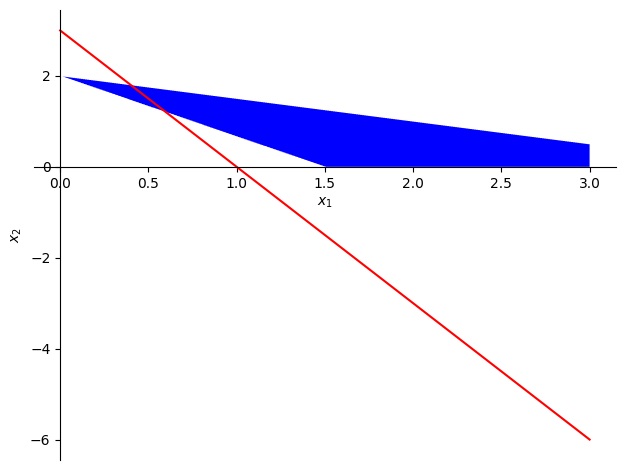

In [ ]:
p2.append(p1[0]) #anida la grafica p1 sobre la grafica p2
p2.show()

Teniendo las restricciones graficadas, es claro que nuestra región factible es un segmento de la recta roja (sacada de la primer restricción que es una ecuacion), que va desde la intersección con la tercer restricción a la intersección con la segunda restricción. \\
Calculemos dichas intersecciones y grafiquemos el segmento de recta:

In [ ]:
a = solve(((Eq(3*x+y-3,0)),(Eq(x+2*y-4,0))),(x,y)) #nos da las intersecciones entre la recta roja y la restricción 3
print(a)
a2 = solve(((Eq(3*x+y-3,0)),(Eq(4*x+3*y-6,0))),(x,y)) #nos da las intersecciones entre la recta roja y la restricción 2
print(a2)
d= Eq(x,2/5) & Eq(y,9/5)
d1= Eq(x,3/5) & Eq(y,6/5)

{x: 2/5, y: 9/5}
{x: 3/5, y: 6/5}


Entonces, nuestra región factible es el segmneto de recta que va del punto $(\frac{2}{5},\frac{9}{5})$ al punto $(\frac{3}{5},\frac{6}{5})$:

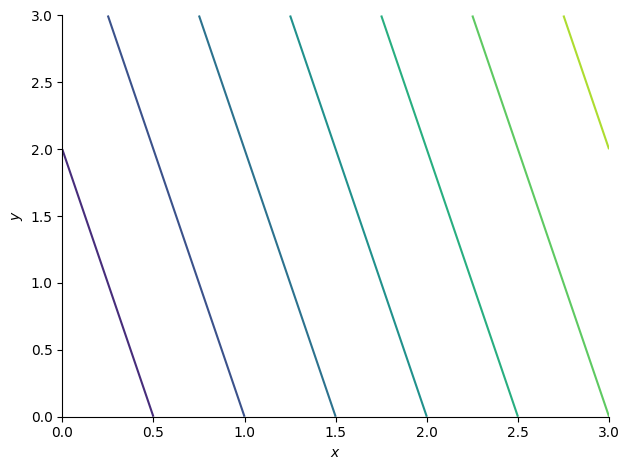

In [ ]:
p3 = plot_contour(4*x + y, (x, 0, 3), (y, 0, 3), ncontours=50, show=True) #Graficamos las curvas de nivel de la funcion objetivo

Es claro, que el minimo y maximo de z se encontraran en los extremos del segmento de recta, es decir, cuando la funcion objetivo interecte de la siguiente forma:

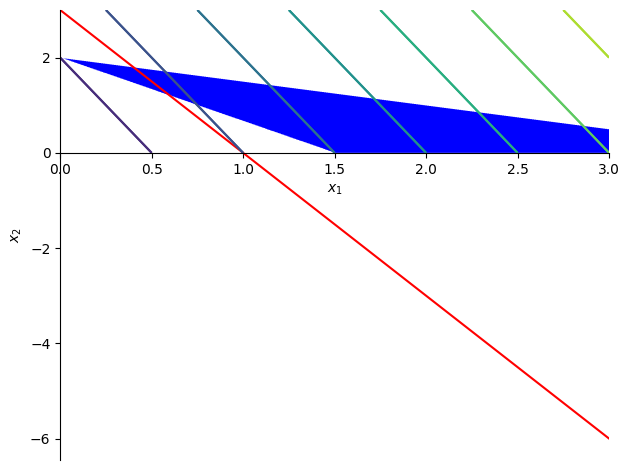

In [ ]:
p2.append(p3[0]) #anida la grafica p1 sobre la grafica p2
p2.show()

Es claro, por el metodo grafico que el minimo de z se encontrará en $(\frac{2}{5},\frac{9}{5})$ luego, $z=\frac{17}{5}$, comprobando así la solución dada por linprog.
(no pude graficar puntos con sympy)